In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef,
    confusion_matrix, classification_report
)

import pickle

In [2]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
a = df["education"].mean()
a

1.9789499153157513

In [7]:
df["education"] = df["education"].fillna(value=df["education"].mean())
df["cigsPerDay"] = df["cigsPerDay"].fillna(value=df["cigsPerDay"].mean())
df["BPMeds"] = df["BPMeds"].fillna(value=df["BPMeds"].mean())
df["totChol"] = df["totChol"].fillna(value=df["totChol"].mean())
df["BMI"] = df["BMI"].fillna(value=df["BMI"].mean())
df["glucose"] = df["glucose"].fillna(value=df["glucose"].mean())
df["heartRate"] = df["heartRate"].fillna(value=df["glucose"].mean())

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

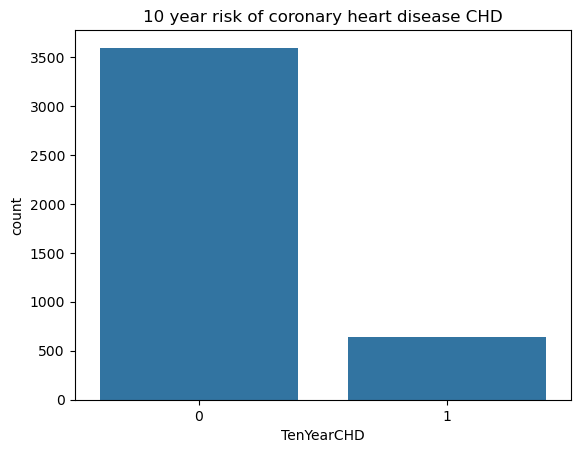

In [9]:
sns.countplot(x="TenYearCHD", data=df)
plt.title("10 year risk of coronary heart disease CHD")
plt.show()

In [10]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(exclude=["int64","float64"]).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [11]:
X = df.drop(columns='TenYearCHD')
y = np.array(df["TenYearCHD"])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-8.72375470e-01,  1.60421930e-01,  2.11511930e-02, ...,
        -2.44588973e-01, -4.92878346e-01,  4.43219251e-02],
       [-8.72375470e-01,  1.09443712e+00,  2.11511930e-02, ...,
         1.60951356e-01,  1.72935705e-01,  2.61974072e-01],
       [ 1.14629541e+00,  8.60933321e-01, -9.64774597e-01, ...,
         5.25209137e-01, -1.07546564e+00, -5.65104087e-01],
       ...,
       [-8.72375470e-01, -5.40089460e-01,  1.99300277e+00, ...,
        -3.56294693e-01,  1.72935705e-01,  8.78523545e-02],
       [-8.72375470e-01, -1.24060085e+00,  1.00707698e+00, ...,
        -5.96704828e-01, -9.92238885e-01,  8.78523545e-02],
       [-8.72375470e-01, -5.40089460e-01, -9.64774597e-01, ...,
         5.44636218e-01, -1.59971321e-01, -6.55749739e-04]])

In [15]:
models = {
    "Logistic_Regression": LogisticRegression(max_iter=1000),
    "Decision_Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive_Bayes": GaussianNB(),
    "Random_Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XG_Boost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
}

In [16]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    trained_models[name] = model

In [17]:
trained_models

{'Logistic_Regression': LogisticRegression(max_iter=1000),
 'Decision_Tree': DecisionTreeClassifier(random_state=42),
 'KNN': KNeighborsClassifier(),
 'Naive_Bayes': GaussianNB(),
 'Random_Forest': RandomForestClassifier(random_state=42),
 'XG_Boost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_para

In [18]:
X_test = scaler.transform(X_test)

In [19]:
y_test.shape

(848,)

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import FunctionTransformer

results = []
    
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan,
        "MCC": matthews_corrcoef(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test,y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC,MCC,confusion_matrix
0,Logistic_Regression,0.847877,0.500000,0.069767,0.122449,0.699098,0.142646,"[[710, 9], [120, 9]]"
1,Decision_Tree,0.739387,0.184932,0.209302,0.196364,0.521897,0.041662,"[[600, 119], [102, 27]]"
2,KNN,0.829009,0.264706,0.069767,0.110429,0.589347,0.064067,"[[694, 25], [120, 9]]"
3,Naive_Bayes,0.806604,0.253521,0.139535,0.180000,0.680909,0.085347,"[[666, 53], [111, 18]]"
4,Random_Forest,0.843160,0.357143,0.038760,0.069930,0.639513,0.073963,"[[710, 9], [124, 5]]"
5,XG_Boost,0.838443,0.366667,0.085271,0.138365,0.631551,0.114403,"[[700, 19], [118, 11]]"


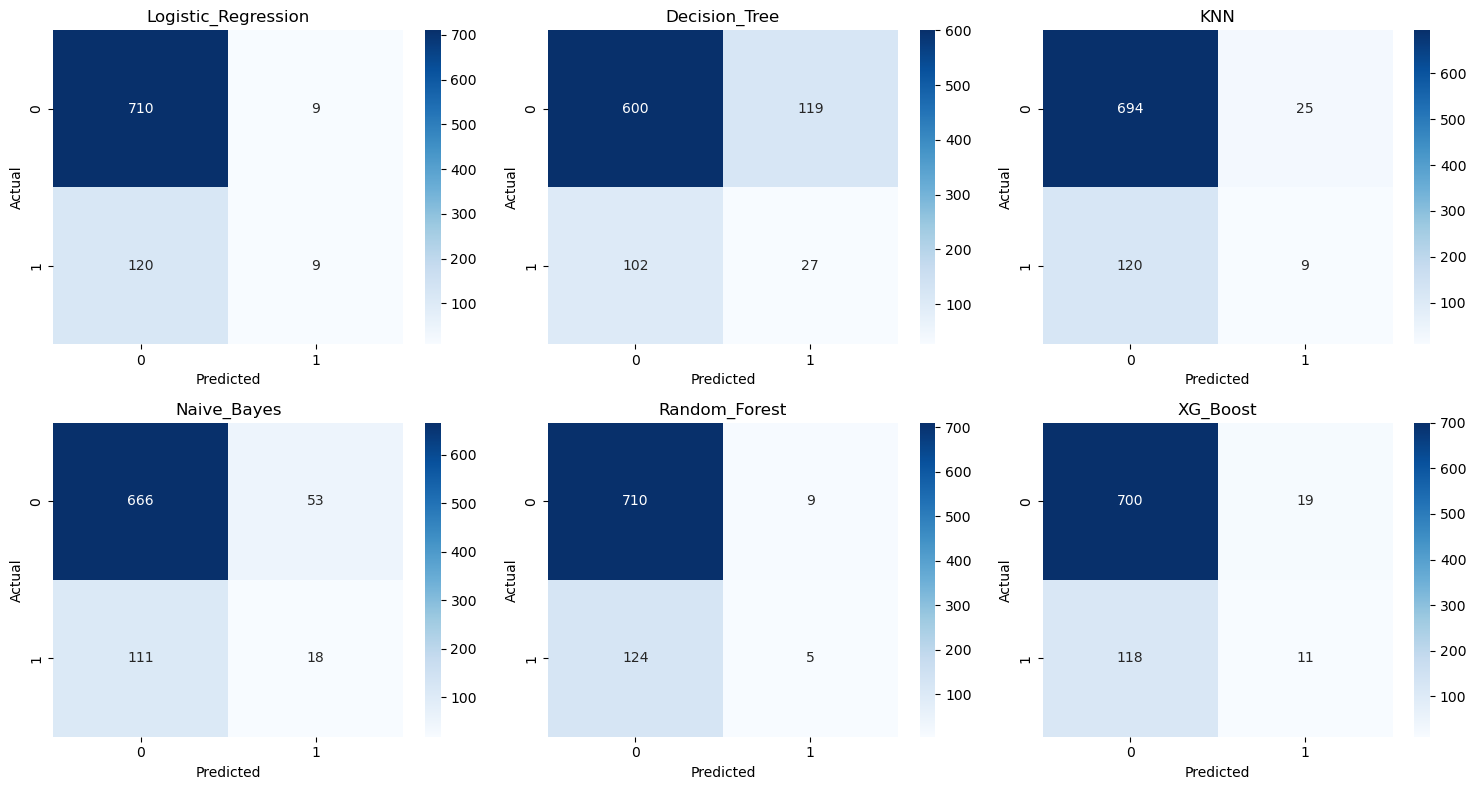

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_models = len(results)

# Decide grid size automatically
cols = 3   # number of columns (change if you want)
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))

# If only 1 row, make axes iterable
axes = axes.flatten()

for i, result in enumerate(results):
    cm = result['confusion_matrix']
    model_name = result['Model']
    
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",ax=axes[i])
    
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_title(model_name)
    
# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Model Observations

- Logistic Regression performs well due to linear separability.
- Decision Tree captures non-linear patterns but may overfit.
- KNN performance depends on distance metric and k value.
- Naive Bayes works fast but assumes feature independence.
- Random Forest gives better generalization due to ensemble learning.
- XGBoost provides a strong performance by boosting weak learners and optimizing errors iteratively.

In [22]:
for name, model in trained_models.items():    
    filename = name +'.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)